
You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv('abalone.csv')

In [11]:
problem2_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
problem2_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
            'Shucked weight', 'Viscera weight', 'Shell weight']
# Fill in the target as a string with the correct column name
problem2_target = "Rings"

In [14]:
problem2_df = pd.get_dummies(problem2_df, columns=['Sex'], drop_first=True)
# Prepare features and target variables
X = problem2_df.drop(columns=[problem2_target])
y = problem2_df[problem2_target]

In [17]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model
problem2_model = LinearRegression()
# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

LinearRegression()

In [26]:
# Part 4
# Evaluate the model by computing the mean absolute error
problem2_y_pred = problem2_model.predict(problem2_X_test)
problem2_mae = np.sum(np.abs(problem2_y_pred - problem2_y_test))/len(problem2_X_test)

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(problem2_y_test, problem2_y_pred)

np.float64(1.583237738943726)

In [27]:
problem2_mae

np.float64(1.583237738943726)

In [28]:
from Utils import makeEDF,plotEDF

In [54]:
# Part 4
# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell
residuals = np.array(problem2_y_test - problem2_y_pred)
edf = makeEDF(residuals)

In [55]:
lower_band

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [1.        , 0.96005351],
       [1.        , 0.96085095],
       [1.        , 0.9616484 ]])

In [56]:
n = len(residuals)
epsilon = np.sqrt(np.log(2 / 0.05) / (2 * n))  # 95% confidence interval using DKW inequality
lower_band = np.clip(edf - epsilon, 0, 1)
upper_band = np.clip(edf + epsilon, 0, 1)

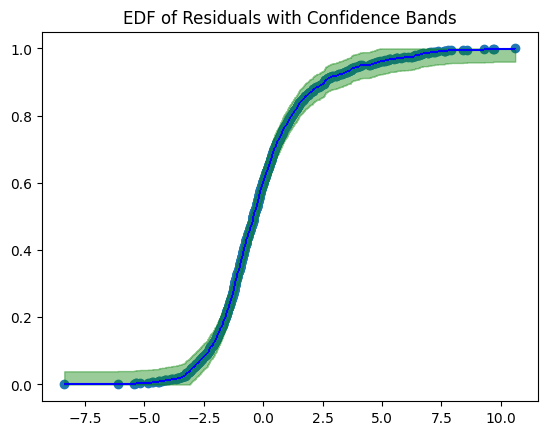

In [57]:
plotEDF(edf, confidence_band=True, alpha=0.95, color='blue', title="EDF of Residuals with Confidence Bands")

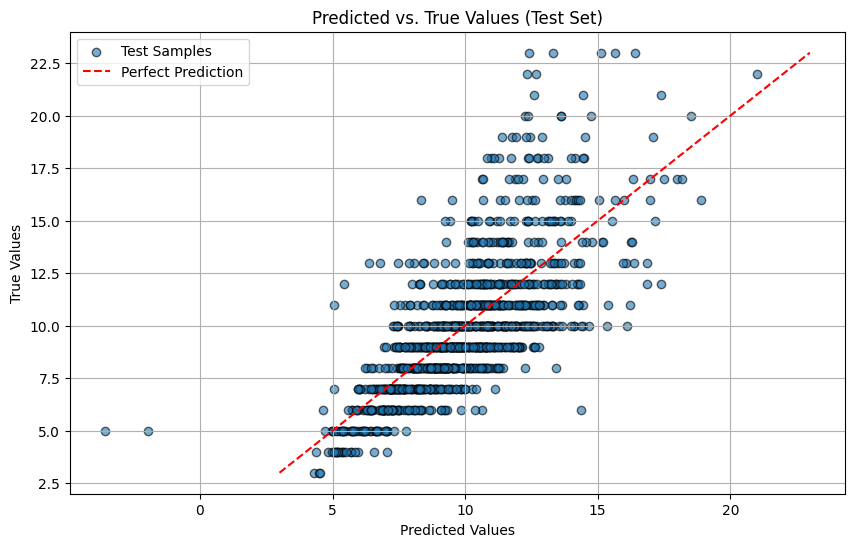

In [58]:
# Part 5
# Write the code below to produce the scatter plot for part 5
# Scatter plot: predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(problem2_y_pred, problem2_y_test, alpha=0.6, edgecolor='k', label="Test Samples")
plt.plot([min(problem2_y_test), max(problem2_y_test)], [min(problem2_y_test), max(problem2_y_test)], 
         color='red', linestyle='--', label="Perfect Prediction")
plt.title("Predicted vs. True Values (Test Set)")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.legend()
plt.grid(True)
plt.show()


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [61]:
# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv('data/visits_clean.csv', delimiter=' ')

In [62]:
problem3_df.head()

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [67]:
problem3_df.columns

Index(['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth',
       'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male',
       'married', 'school', 'faminc', 'employed', 'privins', 'medicaid'],
      dtype='object')

In [92]:
# Part 1

# Fill in the features as a list of strings of the names of the columns
problem3_features = list(set(problem3_df.columns) - {'ofnp', 'opp', 'opnp', 'emr', 'hosp'})
# Fill in the target as a string with the correct column name
problem3_target = "ofp"

In [93]:
# Part 2
# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = problem3_df[problem3_target]
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(problem3_X, problem3_y, test_size=0.3, random_state=42)

In [94]:
problem3_X_train.shape[1]

16

In [95]:
# Part 3
# Fill in the function loss below
class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize
        
        # define the objective/cost/loss function we want to minimise
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values
            # of the coefficients, here coeff[:-1] represent alpha
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])
            # use the Y variable that is available here to define
            # the loss function, return the value of the loss for
            # this Y and for this parameter lam defined above
            return np.sum(lam - Y*(np.dot(X,coeffs[:-1])+coeffs[-1]))
            
        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below
        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='L-BFGS-B',)
        self.coeffs = self.result.x
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])


In [96]:
# Part 4
# Initialize your PoissonRegression model
problem3_model = PoissonRegression()
# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)
# This is to make sure that everything went well,
# check that success is True
print(problem3_model.result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -19062.509597137243
        x: [-9.932e-02 -2.738e-01 ... -1.390e-01  7.904e-01]
      nit: 246
      jac: [-5.915e-01 -1.108e+00 ... -2.256e-01  5.821e-02]
     nfev: 4986
     njev: 277
 hess_inv: <17x17 LbfgsInvHessProduct with dtype=float64>


In [97]:
len(problem3_model.coeffs)

17

In [98]:
problem3_df.describe()

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,...,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,0.077848,0.125738,1.541988,0.204040,...,0.262596,0.181117,7.402406,0.403541,0.546074,10.290286,2.527132,0.103268,0.776441,0.091239
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,0.267963,0.331591,1.349632,0.403044,...,0.440095,0.385159,0.633405,0.490663,0.497929,3.738736,2.924648,0.304343,0.416677,0.287982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.600000,0.000000,0.000000,0.000000,-1.012500,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,6.900000,0.000000,0.000000,8.000000,0.912150,0.000000,1.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,7.300000,0.000000,1.000000,11.000000,1.698150,0.000000,1.000000,0.000000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,0.000000,7.800000,1.000000,1.000000,12.000000,3.172850,0.000000,1.000000,0.000000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,1.000000,1.000000,8.000000,1.000000,...,1.000000,1.000000,10.900000,1.000000,1.000000,18.000000,54.835100,1.000000,1.000000,1.000000


In [99]:
# Part 5
# Put the computed metric value in the variable below
problem3_metric = XXX

NameError: name 'XXX' is not defined

In [102]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on test data
y_pred = problem3_model.predict(problem3_X_test)  # Assuming the model instance is poisson_model
y_true = problem3_y_test  # True values from the test set

# Metric 1: Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Metric 2: Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Metric 3: Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Naive baseline: Predict the mean of the training target values
naive_prediction = np.mean(problem3_y_train)
naive_mae = mean_absolute_error(y_true, np.full_like(y_true, naive_prediction))
naive_mse = mean_squared_error(y_true, np.full_like(y_true, naive_prediction))

# Display results
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nNaive Baseline Performance (Predicting Mean):")
print(f"Naive MAE: {naive_mae}")
print(f"Naive MSE: {naive_mse}")

# Interpretation
if mae < naive_mae:
    print("\nThe model outperforms the naive baseline, indicating it captures meaningful patterns.")
else:
    print("\nThe model does not outperform the naive baseline, suggesting it needs improvement.")


Model Performance:
Mean Absolute Error (MAE): 2.649931631589421
Mean Squared Error (MSE): 15.471556433644267
Root Mean Squared Error (RMSE): 3.933389941722568

Naive Baseline Performance (Predicting Mean):
Naive MAE: 4.351739788199698
Naive MSE: 44.56051437216339

The model outperforms the naive baseline, indicating it captures meaningful patterns.
